In [2]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
df_0414 = pd.read_csv(r"C:\Users\Josh\Desktop\Personal Project\Portfolio Projects\Uber\Data\Datasets\uber-raw-data-apr14.csv")
df_0514 = pd.read_csv(r"C:\Users\Josh\Desktop\Personal Project\Portfolio Projects\Uber\Data\Datasets\uber-raw-data-may14.csv")
df_0614 = pd.read_csv(r"C:\Users\Josh\Desktop\Personal Project\Portfolio Projects\Uber\Data\Datasets\uber-raw-data-jun14.csv")
df_0714 = pd.read_csv(r"C:\Users\Josh\Desktop\Personal Project\Portfolio Projects\Uber\Data\Datasets\uber-raw-data-jul14.csv")
df_0814 = pd.read_csv(r"C:\Users\Josh\Desktop\Personal Project\Portfolio Projects\Uber\Data\Datasets\uber-raw-data-aug14.csv")
df_0914 = pd.read_csv(r"C:\Users\Josh\Desktop\Personal Project\Portfolio Projects\Uber\Data\Datasets\uber-raw-data-sep14.csv")


In [4]:
df_0414.head()

,Date/Time,Lat,Lon,Base
0,4/1/2014 0:11:00,40.7690,-73.9549,B02512
1,4/1/2014 0:17:00,40.7267,-74.0345,B02512
2,4/1/2014 0:21:00,40.7316,-73.9873,B02512
3,4/1/2014 0:28:00,40.7588,-73.9776,B02512
4,4/1/2014 0:33:00,40.7594,-73.9722,B02512


In [5]:
# MERGING ALL THE DATFRAMES TOGETHER - USING .CONCAT IN CONJUNCTION WITH .DATAFRAME() 

final = pd.DataFrame()

final = pd.concat([df_0414, final])

final = pd.concat([df_0514, final])

final = pd.concat([df_0614, final])

final = pd.concat([df_0714, final])

final = pd.concat([df_0814, final])

final = pd.concat([df_0914, final])

final.shape



(4534327, 4)

In [6]:
# CHECK THE NEW DATAFRAME CREATED USING .CONCAT

final.head()
final.tail()
final.shape


(4534327, 4)

In [7]:
# CHECKING FOR DUPLICATED VALUES: 

final.duplicated().sum() # CHECKING HOW MANY DUPLICATE VALUES ARE IN THE NEW DATAFRAME
final.drop_duplicates(inplace = True) #DROPPING DUPLICATE VALUES IN DATAFRAME
final.shape # CHECKING DUPLICATE VALUES HAVE BEEN REMOVED FROM DATAFRAME (4534327 TO 4451746) - Removed 82581 duplicates

(4451746, 4)

In [8]:
# CHECKING FOR MISSING VALUES AND DATATYPES: 

final.dtypes # Date/Time needs to be a date/time datatype (not a string)

# CHECKING DATAFRAME FOR NULL VALUES 

final.isnull().sum() # NO NULL CALUES PRESENT IN THE DATAFRAME 


Date/Time    0
Lat          0
Lon          0
Base         0
dtype: int64

In [9]:
# CONVERTING THE DATE/TIME COLUMN FROM STRING INTO A DATE/TIME DATA TYPE

final['Date/Time'] = pd.to_datetime(final['Date/Time']) # Note - Make sure you overwrite the correct column you want to change i.e final[Date/Time]



In [10]:
final.head()

,Date/Time,Lat,Lon,Base
0,2014-09-01 00:01:00,40.2201,-74.0021,B02512
1,2014-09-01 00:01:00,40.7500,-74.0027,B02512
2,2014-09-01 00:03:00,40.7559,-73.9864,B02512
3,2014-09-01 00:06:00,40.7450,-73.9889,B02512
4,2014-09-01 00:11:00,40.8145,-73.9444,B02512


In [11]:
final['Hours'] = final['Date/Time'].dt.hour

In [12]:
# CONVERTING DATETIME INTO DAY AND HOUR: 

final['day_name'] = final['Date/Time'].dt.day_name()
final.head()

,Date/Time,Lat,Lon,Base,Hours,day_name
0,2014-09-01 00:01:00,40.2201,-74.0021,B02512,0,Monday
1,2014-09-01 00:01:00,40.7500,-74.0027,B02512,0,Monday
2,2014-09-01 00:03:00,40.7559,-73.9864,B02512,0,Monday
3,2014-09-01 00:06:00,40.7450,-73.9889,B02512,0,Monday
4,2014-09-01 00:11:00,40.8145,-73.9444,B02512,0,Monday


In [13]:
base_count = final.copy()
df = final.copy()

In [14]:
pivot = final.groupby(['Hours','day_name']).size().unstack()
pivot_reindex = pivot.reindex(columns = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
pivot_chart = pivot_reindex

In [15]:
# pivot_chart = pivot_chart.reindex([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,0])
# pivot_chart.rename({'0':'24'}, axis = 0)

In [16]:
# pivot_chart = pivot_chart.rename({0:24}, axis = 0)

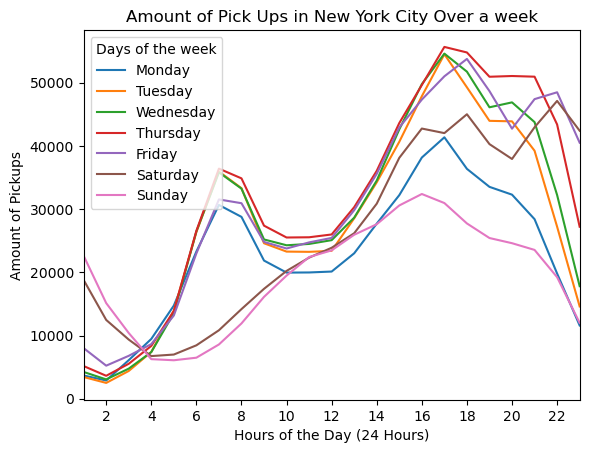

In [17]:
sns.lineplot(data=pivot_chart, dashes = False,).set(xlabel = "Hours of the Day (24 Hours)" , ylabel = "Amount of Pickups", title = "Amount of Pick Ups in New York City Over a week", xlim = (1,23), xticks = [2,4,6,8,10,12,14,16,18,20,22]);
plt.legend(title="Days of the week")
plt.show()

## LOCATIONS OF PICK UPS IN NEW YORK CITY

In [18]:
pickups = final.copy()

In [19]:
pickups.head()

,Date/Time,Lat,Lon,Base,Hours,day_name
0,2014-09-01 00:01:00,40.2201,-74.0021,B02512,0,Monday
1,2014-09-01 00:01:00,40.7500,-74.0027,B02512,0,Monday
2,2014-09-01 00:03:00,40.7559,-73.9864,B02512,0,Monday
3,2014-09-01 00:06:00,40.7450,-73.9889,B02512,0,Monday
4,2014-09-01 00:11:00,40.8145,-73.9444,B02512,0,Monday


In [20]:
pickups = pickups.drop(['Hours', 'day_name', 'Base'], axis = 1)

In [21]:
pickups.shape

(4451746, 3)

In [22]:
pickups.head(2)

,Date/Time,Lat,Lon
0,2014-09-01 00:01:00,40.2201,-74.0021
1,2014-09-01 00:01:00,40.7500,-74.0027


In [23]:
pickups['Lat']

0         40.2201
1         40.7500
2         40.7559
3         40.7450
4         40.8145
           ...   
564511    40.7640
564512    40.7629
564513    40.7443
564514    40.6756
564515    40.6880
Name: Lat, Length: 4451746, dtype: float64

In [24]:
pickups['Lon']

0        -74.0021
1        -74.0027
2        -73.9864
3        -73.9889
4        -73.9444
           ...   
564511   -73.9744
564512   -73.9672
564513   -73.9889
564514   -73.9405
564515   -73.9608
Name: Lon, Length: 4451746, dtype: float64

In [25]:
40.7690, -73.9549

(40.769, -73.9549)

### CREATING THE HEATMAP: 

In [26]:
import folium 
from folium.plugins import HeatMap
from folium.plugins import MarkerCluster 

In [27]:
pickups.head(2)

,Date/Time,Lat,Lon
0,2014-09-01 00:01:00,40.2201,-74.0021
1,2014-09-01 00:01:00,40.7500,-74.0027


In [28]:
pickups = pickups.sample(10000)
print(pickups.shape)

(10000, 3)


In [29]:
m = folium.Map(location = [40.7, -73.9], zoom_start = 9) # Importing the markers map from Folium
heat_m = folium.Map(location = [40.7, -73.9], zoom_start = 8) # Importing the HeatMap from Folium

In [30]:
pickups.dtypes # Checking the values of the Lat/Lon columns are Floats

Date/Time    datetime64[ns]
Lat                 float64
Lon                 float64
dtype: object

In [31]:
pickups.duplicated().sum() # Checking if there are any duplicates.
pickups = pickups.drop_duplicates() # Removing the duplicates for the DataFrame.

In [32]:
pickups = pickups.dropna(how = 'all') #Dropping any na values from the Dataframe

In [33]:
pickups.head()

,Date/Time,Lat,Lon
575246,2014-07-30 21:35:00,40.6447,-73.7817
648942,2014-06-29 19:59:00,40.7572,-73.9939
613857,2014-07-05 00:22:00,40.7528,-73.9951
1733,2014-08-02 14:09:00,40.7500,-73.9878
244691,2014-04-07 18:35:00,40.7763,-73.9619


In [34]:
pickups.shape

(10000, 3)

In [35]:
# for index, row in pickups.iterrows(): 
#     folium.CircleMarker([row['Lat'], row['Lon']], 
#                     radius = 2,    
#                     popup= row['Date/Time'], # You can add the Base Column too! 
#                     fill_color = "red").add_to(m)

- Reduced sample size 

- Bucket them

- Map box API - Bubble map - Map whole dataset - plotly.express as px (Lon = Lon, lat = df, size = )

- Folium - Cluster Markers - https://deparkes.co.uk/2016/06/24/folium-marker-clusters/

- Simplify 'Lon' and 'Lat' to round to 4 places. 

pickups['Lat (Simplified)'] = round(pickups['Lat'])

pickups['Lon (Simplified)'] = round(pickups['Lon'])

You could try rounding - ROUND([lat],4) ROUND([lon],4)

In [36]:
# ROUNDING THE LAT AND LON VALUES TO ROUND POINTS: 

lat = 40.75258189875482
lon = -74.0065557551885

simple_lat = round(lat,4)
simple_lon = round(lon,4)


print(simple_lat)
print(simple_lon)

40.7526
-74.0066


In [37]:
pickups.shape

(10000, 3)

In [38]:
# SIMPLIFYING THE LON AND LAT VALUES TO 2 DECIMAL POINTS FOR BUCKETING ON CLUSTER MAPS: 

pickups['simple_lat'] = round(pickups['Lat'],2)
pickups['simple_lon'] = round(pickups['Lon'],2)

In [39]:
locations = list(zip(pickups['simple_lat'], pickups['simple_lon']))
#popups = ["lon:{}<br>lat:{}".format(pickups['simple_lon'], pickups['simple_lat']) for (pickups['simple_lat'], pickups['simple_lon']) in locations]



marker_cluster = MarkerCluster(
    locations = locations,
    name="NYC UBER PICKUPS",
    )

marker_cluster.add_to(m);


In [40]:
m

In [41]:
# lat_lon = (40.75258189875482, -74.0065557551885)

# def round_to_4(num):
#     result = round(num, 4)
#     return(result)

# round_to_4(lat_lon)


In [42]:
pickups['Lat'].dtypes

dtype('float64')

In [43]:
pickups_mat = pickups[['Lat', 'Lon']].to_numpy()
HeatMap(pickups_mat).add_to(heat_m);

In [44]:
heat_m

### AMOUNT OF PICKUPS PER MONTH: 

In [45]:
final.head()

,Date/Time,Lat,Lon,Base,Hours,day_name
0,2014-09-01 00:01:00,40.2201,-74.0021,B02512,0,Monday
1,2014-09-01 00:01:00,40.7500,-74.0027,B02512,0,Monday
2,2014-09-01 00:03:00,40.7559,-73.9864,B02512,0,Monday
3,2014-09-01 00:06:00,40.7450,-73.9889,B02512,0,Monday
4,2014-09-01 00:11:00,40.8145,-73.9444,B02512,0,Monday


In [46]:
final.shape

(4451746, 6)

In [47]:
final.dtypes

Date/Time    datetime64[ns]
Lat                 float64
Lon                 float64
Base                 object
Hours                 int32
day_name             object
dtype: object

In [48]:
final['Month'] = final['Date/Time'].dt.month

In [49]:
total = final['Hours'].value_counts()


In [50]:
april = final.query('`Month`== 4')
may = final.query('`Month`== 5')
june = final.query('`Month`== 6')
july = final.query('`Month`== 7')
august = final.query('`Month`== 8')
september = final.query('`Month`== 9')

In [51]:
april_total = april['Month'].sum()
may_total = may['Month'].sum()
june_total = june['Month'].sum()
july_total = july['Month'].sum()
august_total = august['Month'].sum()
september_total = september['Month'].sum()

In [52]:
print(april_total)
print(may_total)
print(june_total)
print(july_total)
print(august_total)
print(september_total)

2227068
3211800
3918948
5473783
6507144
9036891


In [53]:
data = {'Months' : ['April', 'May', 'June', 'July', 'August', 'September'],
        'Totals' : [april_total,  may_total,  june_total,  july_total,  august_total,  september_total]}

months = pd.DataFrame(data)

print(months)

      Months   Totals
0      April  2227068
1        May  3211800
2       June  3918948
3       July  5473783
4     August  6507144
5  September  9036891


In [54]:
months

,Months,Totals
0,April,2227068
1,May,3211800
2,June,3918948
3,July,5473783
4,August,6507144
5,September,9036891


In [55]:
x = months['Months']
y = months['Totals']



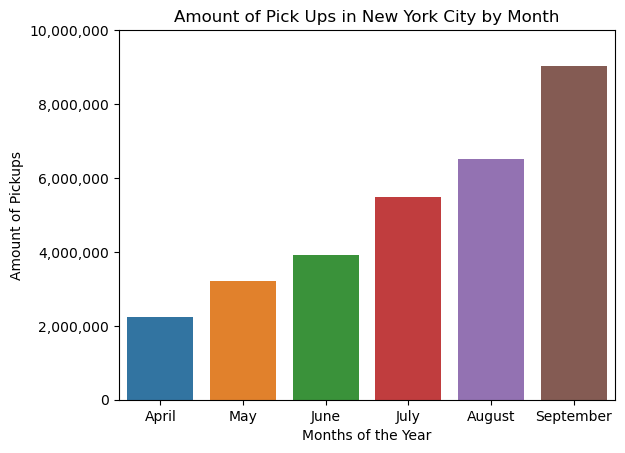

In [56]:
sns.barplot(x = x, y = y,).set(xlabel = "Months of the Year", ylabel = "Amount of Pickups", title = "Amount of Pick Ups in New York City by Month", yticklabels = ['0', '2,000,000', '4,000,000', '6,000,000', '8,000,000', '10,000,000'], ylim = (0,10000000));
plt.show()


In [57]:
yticks = [2000000, 4000000, 6000000, 8000000, 10000000]

### PICKUPS BY DAY

In [58]:
days = final.copy()


monday = days.query('`day_name` == "Monday"')
tuesday = days.query('`day_name` == "Tuesday"')
wednesday = days.query('`day_name` == "Wednesday"')
thursday = days.query('`day_name` == "Thursday"')
friday = days.query('`day_name` == "Friday"')
saturday = days.query('`day_name` == "Saturday"')
sunday = days.query('`day_name` == "Sunday"')

In [59]:
monday_total = monday.query('`day_name` == "Monday"').value_counts().sum()
tuesday_total = tuesday.query('`day_name` == "Tuesday"').value_counts().sum()
wednesday_total = wednesday.query('`day_name` == "Wednesday"').value_counts().sum()
thursday_total = thursday.query('`day_name` == "Thursday"').value_counts().sum()
friday_total = friday.query('`day_name` == "Friday"').value_counts().sum()
saturday_total = saturday.query('`day_name` == "Saturday"').value_counts().sum()
sunday_total = sunday.query('`day_name` == "Sunday"').value_counts().sum()

print(monday_total, tuesday_total, wednesday_total, thursday_total, friday_total, saturday_total, sunday_total)

532133 651753 683604 741372 727532 634194 481158


In [60]:
day = {'Day' : ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'],
        'Totals' : [monday_total, tuesday_total, wednesday_total,  thursday_total,  friday_total, saturday_total, sunday_total]}

daytotal = pd.DataFrame(day)

print(daytotal)

         Day  Totals
0     Monday  532133
1    Tuesday  651753
2  Wednesday  683604
3   Thursday  741372
4     Friday  727532
5   Saturday  634194
6     Sunday  481158


In [61]:
daytotal.head()

,Day,Totals
0,Monday,532133
1,Tuesday,651753
2,Wednesday,683604
3,Thursday,741372
4,Friday,727532


In [62]:
x2 = daytotal['Day']
y2 = daytotal['Totals']

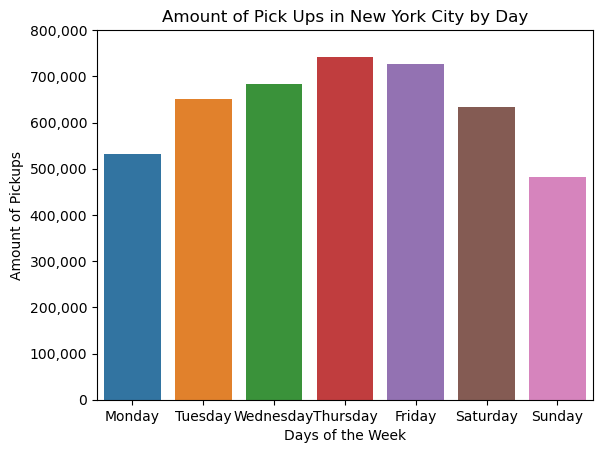

In [63]:
sns.barplot(x = x2, y = y2,).set(xlabel = "Days of the Week", ylabel = "Amount of Pickups", title = "Amount of Pick Ups in New York City by Day", yticklabels = ['0', '100,000', '200,000', '300,000', '400,000', '500,000', '600,000', '700,000', '800,000'], ylim = (0,800000));
plt.show()

In [64]:
days.groupby(['Date/Time','day_name']).size().unstack()

day_name,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
Date/Time,,,,,,,
2014-04-01 00:00:00,NaN,NaN,NaN,NaN,NaN,3.0,NaN
2014-04-01 00:01:00,NaN,NaN,NaN,NaN,NaN,1.0,NaN
2014-04-01 00:02:00,NaN,NaN,NaN,NaN,NaN,3.0,NaN
2014-04-01 00:03:00,NaN,NaN,NaN,NaN,NaN,2.0,NaN
2014-04-01 00:04:00,NaN,NaN,NaN,NaN,NaN,1.0,NaN
...,...,...,...,...,...,...,...
2014-09-30 22:55:00,NaN,NaN,NaN,NaN,NaN,12.0,NaN
2014-09-30 22:56:00,NaN,NaN,NaN,NaN,NaN,14.0,NaN
2014-09-30 22:57:00,NaN,NaN,NaN,NaN,NaN,18.0,NaN


### MOST POPULAR BASE:

In [65]:
final.head(2)

,Date/Time,Lat,Lon,Base,Hours,day_name,Month
0,2014-09-01 00:01:00,40.2201,-74.0021,B02512,0,Monday,9
1,2014-09-01 00:01:00,40.7500,-74.0027,B02512,0,Monday,9


In [66]:
final['Base'].unique()

array(['B02512', 'B02598', 'B02617', 'B02682', 'B02764'], dtype=object)

In [67]:
base_1 = final.query('`Base` == "B02512"') # BASE NAME = UNTER - 40.75258189875482, -74.0065557551885
base_2 = final.query('`Base` == "B02598"') # BASE NAME = HINTER - 40.75258189875482, -74.0065557551885
base_3 = final.query('`Base` == "B02617"') # BASE NAME = WEITER - 40.75258189875482, -74.0065557551885
base_4 = final.query('`Base` == "B02682"') # BASE NAME = SCHMECKEN - 40.75258189875482, -74.0065557551885
base_5 = final.query('`Base` == "B02764"') # BASE NAME = DANACH - NY - 40.75258189875482, -74.0065557551885


In [68]:
base1total = base_1.value_counts().sum()
base2total = base_2.value_counts().sum()
base3total = base_3.value_counts().sum()
base4total = base_4.value_counts().sum()
base5total = base_5.value_counts().sum()

In [69]:
base2total

1379578

In [70]:
print(base1total)
print(base2total)
print(base3total)
print(base4total)
print(base5total)

200353
1379578
1417983
1198901
254931


In [71]:
base = {'Base' : ['UNTER', 'HINTER', 'WEITER', 'CHMECKEN', 'DANACH - NY'],
        'Totals' : [base1total, base2total, base3total,  base4total,  base5total]}

basetotal = pd.DataFrame(base)

print(basetotal)

          Base   Totals
0        UNTER   200353
1       HINTER  1379578
2       WEITER  1417983
3     CHMECKEN  1198901
4  DANACH - NY   254931


In [72]:
x1 = basetotal['Base']
y1 = basetotal['Totals']

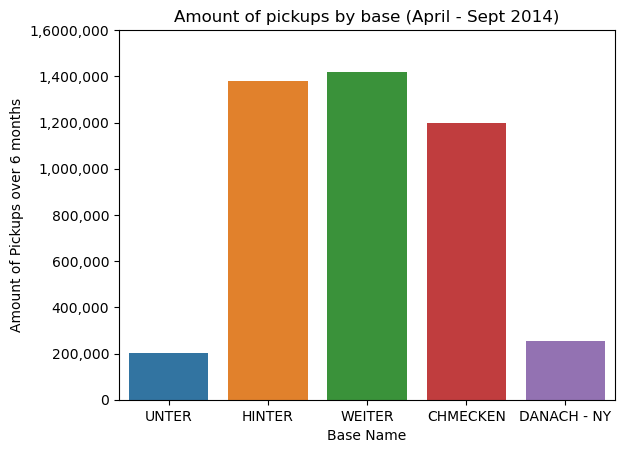

In [73]:
sns.barplot(x = x1, y = y1).set(xlabel = "Base Name", ylabel = "Amount of Pickups over 6 months", title = "Amount of pickups by base (April - Sept 2014)", yticklabels = ['0', '200,000', '400,000', '600,000', '800,000', '1,000,000', '1,200,000', '1,400,000', '1,6000,000'], ylim = (0,1600000));
plt.show()

### NYC WEATHER - MONTHLY 

In [4]:
nyc_weather = pd.read_csv(r"C:\Users\Josh\Desktop\Personal Project\Portfolio Projects\Uber\Data\Datasets\New York Weather (Yearly - 2016)\weather_data_nyc.csv")

In [5]:
nyc_weather.head()

,date,maximum temperature,minimum temperature,average temperature,precipitation,snow fall,snow depth
0,1-1-2016,42,34,38.0,0.00,0.0,0
1,2-1-2016,40,32,36.0,0.00,0.0,0
2,3-1-2016,45,35,40.0,0.00,0.0,0
3,4-1-2016,36,14,25.0,0.00,0.0,0
4,5-1-2016,29,11,20.0,0.00,0.0,0


In [6]:
# CLEANING THE DATASET 

nyc_weather.duplicated().sum() # CHECK FOR DUPLICATES

nyc_weather['date'] = pd.to_datetime(nyc_weather['date'], format='mixed', dayfirst=1-1-2016) # Converting the Date column into a datatime data type

nyc_weather = nyc_weather.drop(['snow fall', 'snow depth'], axis = 1) #Removing unwanted columns from DataFrame

nyc_weather.replace('T', 0.0, inplace=True) # Replacing all 'T' values in DataFrame to '0.0' to convert to float value.

nyc_weather['precipitation'] = nyc_weather['precipitation'].astype(float) # Converting precipitation column into a float datatype

nyc_weather['month'] = nyc_weather['date'].dt.month #CONVERT THE DATE COLUMN TO MONTHS


In [7]:
nyc_weather.describe()
nyc_weather.head()

,date,maximum temperature,minimum temperature,average temperature,precipitation,month
0,2016-01-01,42,34,38.0,0.0,1
1,2016-01-02,40,32,36.0,0.0,1
2,2016-01-03,45,35,40.0,0.0,1
3,2016-01-04,36,14,25.0,0.0,1
4,2016-01-05,29,11,20.0,0.0,1


In [10]:
nyc_rain = nyc_weather.copy()

In [11]:
nyc_weather.dtypes

date                   datetime64[ns]
maximum temperature             int64
minimum temperature             int64
average temperature           float64
precipitation                 float64
month                           int32
dtype: object

In [15]:
apr = nyc_weather.query('`month` == 4')
may = nyc_weather.query('`month` == 5')
jun = nyc_weather.query('`month` == 6')
jul = nyc_weather.query('`month` == 7')
aug = nyc_weather.query('`month` == 8')
sep = nyc_weather.query('`month` == 9')

In [16]:
sep.head()

,date,maximum temperature,minimum temperature,average temperature,precipitation,month
244,2016-09-01,79,69,74.0,0.5,9
245,2016-09-02,81,66,73.5,0.0,9
246,2016-09-03,75,66,70.5,0.0,9
247,2016-09-04,80,65,72.5,0.0,9
248,2016-09-05,84,65,74.5,0.0,9


In [17]:
apr_rain = round(apr['precipitation'].sum(),2)
may_rain = round(may['precipitation'].sum(),2)
jun_rain = round(jun['precipitation'].sum(),2)
jul_rain = round(jul['precipitation'].sum(),2)
aug_rain = round(aug['precipitation'].sum(),2)
sep_rain = round(sep['precipitation'].sum(),2)


In [18]:
print(apr_rain)
print(may_rain)
print(jun_rain)
print(jul_rain)
print(aug_rain)
print(sep_rain)

1.61
3.75
2.6
7.02
1.97
2.79


In [19]:
nyc_rain = {'months' : ['April', 'May', 'June', 'July', 'August', 'September'],
        'total_rain' : [apr_rain, may_rain, jun_rain, jul_rain, aug_rain, sep_rain]}

nyc_rain = pd.DataFrame(nyc_rain)

print(nyc_rain)

      months  total_rain
0      April        1.61
1        May        3.75
2       June        2.60
3       July        7.02
4     August        1.97
5  September        2.79


In [20]:
nyc_rain.head()

,months,total_rain
0,April,1.61
1,May,3.75
2,June,2.60
3,July,7.02
4,August,1.97


In [22]:
months_x = nyc_rain['months']
rain_y = nyc_rain['total_rain']

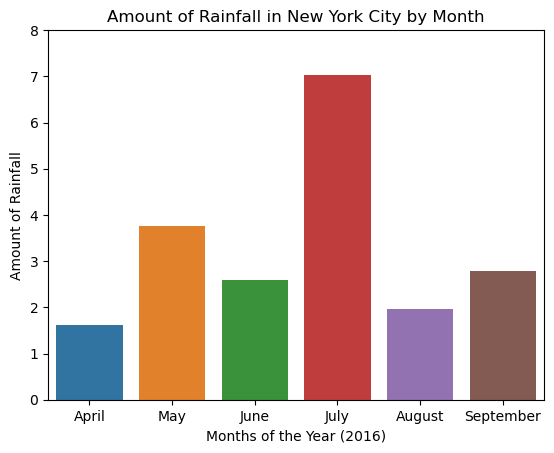

In [25]:
sns.barplot(x = months_x, y = rain_y,).set(xlabel = "Months of the Year (2016)", ylabel = "Amount of Rainfall", title = "Amount of Rainfall in New York City by Month", yticklabels = ['0', '1', '2', '3', '4', '5', '6', '7', '8'], ylim = (0,8));
plt.show()